# Prototype: delta

| Properties      | Data    |
|---------------|-----------|
| *Labels* | `['BENIGN', 'DDoS']` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `10.000`|
| *Adversarial Attack* | `CW` |
| *Explanations* | `SHAP` |


---

## *Has to be run first alone!*

In [73]:
# To import modules from the functions directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

## Data Preprocessing

In [138]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
label_names = ['BENIGN', 'DDoS'] # labels to include
sample_size = 10000 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset(label_names)

normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=42)
print(f"Generate Features | Indices: {feature_df.index[:5]}... | Shape: {feature_df.shape}")
print(f"Generate Labels | Indices: {label_df.index[:5]}... | Shape: {label_df.shape}")
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
--- Removing NaN and Infinity values ---
Removing 1358 Rows with NaN values
Removing 1509 Rows with Infinity values
--- Extracting labels ---
 Label
BENIGN    2271320
DDoS       128025
Name: count, dtype: int64
-- Generating normalizer --
--- Splitting labels and features ---
Zero Columns: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (20000, 79)
--- Splitti

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17000, 70) (3000, 70) (17000, 2) (3000, 2)


## Create IDS

In [142]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# TODO: build ids with complete dataset
# build ids and evaluate it on test data
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)
# store prediction from X_train
y_pred = ids.predict(ids_model, X_train, columns=y_train.columns)
print(f"Predictions on Normal Data | Indices: {y_pred.index[:5]}... | Shape: {y_pred.shape}")

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8637 - loss: 0.4898 - val_accuracy: 0.9785 - val_loss: 0.0679
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9772 - loss: 0.0637 - val_accuracy: 0.9815 - val_loss: 0.0461
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9811 - loss: 0.0464 - val_accuracy: 0.9829 - val_loss: 0.0379
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9838 - loss: 0.0377 - val_accuracy: 0.9859 - val_loss: 0.0327
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9861 - loss: 0.0324 - val_accuracy: 0.9962 - val_loss: 0.0294
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9890 - loss: 0.0284 - val_accuracy: 0.9935 - val_loss: 0.0267
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9906 - loss: 0.0255 - val_accuracy: 0.9932 - val_loss: 0.0248
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9916 - loss: 0.0232 - val_accuracy: 0.

2025-03-18 14:38:23.046885: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
Predictions on Normal Data | Indices: Index([377803, 430808, 786353, 1543735, 344730], dtype='int64')... | Shape: (17000, 2)


## Generate Attacks

In [143]:
import functions.attack_generator as ag
import importlib
import numpy as np
importlib.reload(ag)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# create smaller dataset
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

import multiprocessing
num_cores = multiprocessing.cpu_count()

# generate attacks on the training data
X_adv = ag.generate_cw_attacks_parallel(art_model, X_train, target_label=1, num_cores=num_cores)
print(f"Create Adversarial Attack | Indices: {X_adv.index[:5]}... | Shape: {X_adv.shape}")

y_pred_adv = ag.evaluate_art_model(art_model, X_adv, y_train)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv.index[:5]}... | Shape: {y_pred_adv.shape}")

(16000, 70) (4000, 70) (16000, 2) (4000, 2)
Running attack using 24 CPU cores...

Process 139230 is generating adversarial examples for batch of size 666 
Process 139231 is generating adversarial examples for batch of size 666 
Process 139232 is generating adversarial examples for batch of size 666 

Process 139233 is generating adversarial examples for batch of size 666 


Process 139234 is generating adversarial examples for batch of size 666 

Process 139235 is generating adversarial examples for batch of size 666 

Process 139237 is generating adversarial examples for batch of size 666 
Process 139236 is generating adversarial examples for batch of size 666 

Process 139238 is generating adversarial examples for batch of size 666 


Process 139239 is generating adversarial examples for batch of size 666 

Process 139240 is generating adversarial examples for batch of size 666 
Process 139242 is generating adversarial examples for batch of size 666 

Process 139241 is generating adv

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]


Process 139244 is generating adversarial examples for batch of size 666 

Process 139245 is generating adversarial examples for batch of size 666 

Process 139246 is generating adversarial examples for batch of size 666 
Process 139247 is generating adversarial examples for batch of size 666 



C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]


Process 139248 is generating adversarial examples for batch of size 666 


C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]


Process 139249 is generating adversarial examples for batch of size 666 


C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]



Process 139251 is generating adversarial examples for batch of size 666 
Process 139252 is generating adversarial examples for batch of size 666 


C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

Process 139253 is generating adversarial examples for batch of size 682 


C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]



Process 139250 is generating adversarial examples for batch of size 666 


C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/682 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/666 [00:00<?, ?it/s]

Create Adversarial Attack | Indices: Index([971894, 575390, 2464696, 2065223, 505249], dtype='int64')... | Shape: (16000, 70)
Accuracy: 78.59%
              precision    recall  f1-score   support

      BENIGN       1.00      0.57      0.73      8019
      ATTACK       0.70      1.00      0.82      7981

    accuracy                           0.79     16000
   macro avg       0.85      0.79      0.78     16000
weighted avg       0.85      0.79      0.78     16000

Confusion Matrix: Positive == BENIGN
TN: 4594, FP: 3425, FN: 0, TP: 7981
Predictions on Adversarial Attacks | Indices: Index([971894, 575390, 2464696, 2065223, 505249], dtype='int64')... | Shape: (16000, 2)


In [144]:
# find correctly classified samples
benign_indices = y_train[y_train['BENIGN'] == 1].index
print(f"Benign Samples: {len(benign_indices)}")
benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
print(f"    Predicted Benign Samples on Normal Data: {len(benign_adv_predicted_indices)}")
benign_predicted_adversarial_indices = y_pred_adv[y_pred_adv['BENIGN'] == 1].index
print(f"    Predicted Benign Samples on Adversarial Data: {len(benign_predicted_adversarial_indices)}")
attack_indices = y_train[y_train['ATTACK'] == 1].index
print(f"Attack Samples: {len(attack_indices)}")
attack_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
print(f"    Predicted Attack Samples on Normal Data: {len(attack_adv_predicted_indices)}")
attack_predicted_adversarial_indices = y_pred_adv[y_pred_adv['ATTACK'] == 1].index
print(f"    Predicted Attack Samples on Adversarial Data: {len(attack_predicted_adversarial_indices)}")
print("-----------------------------")
correctly_benign_classified_indices = benign_indices.intersection(benign_adv_predicted_indices)
print(f"Correctly classified as BENIGN from the IDS: {len(correctly_benign_classified_indices)} | Indices: {correctly_benign_classified_indices[:3]}")
misclassified_as_benign_due_attack_indices = attack_indices.intersection(attack_adv_predicted_indices).intersection(benign_predicted_adversarial_indices)
print(f"ATTACK sample misclassified as BENIGN due to adversarial attack: {len(misclassified_as_benign_due_attack_indices)} | Indices: {misclassified_as_benign_due_attack_indices[:3]}")

Benign Samples: 7981
    Predicted Benign Samples on Normal Data: 8536
    Predicted Benign Samples on Adversarial Data: 11406
Attack Samples: 8019
    Predicted Attack Samples on Normal Data: 8464
    Predicted Attack Samples on Adversarial Data: 4594
-----------------------------
Correctly classified as BENIGN from the IDS: 7962 | Indices: Index([971894, 575390, 2464696], dtype='int64')
ATTACK sample misclassified as BENIGN due to adversarial attack: 3360 | Indices: Index([450520, 386181, 418682], dtype='int64')


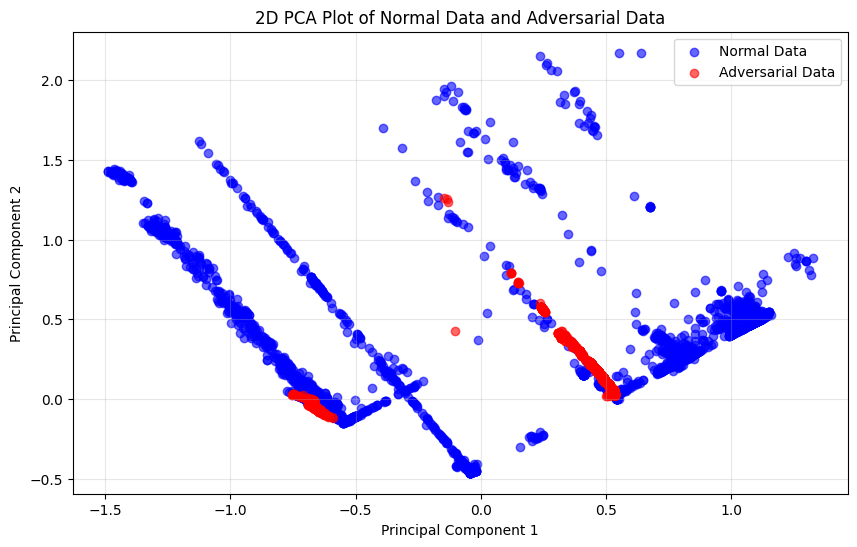

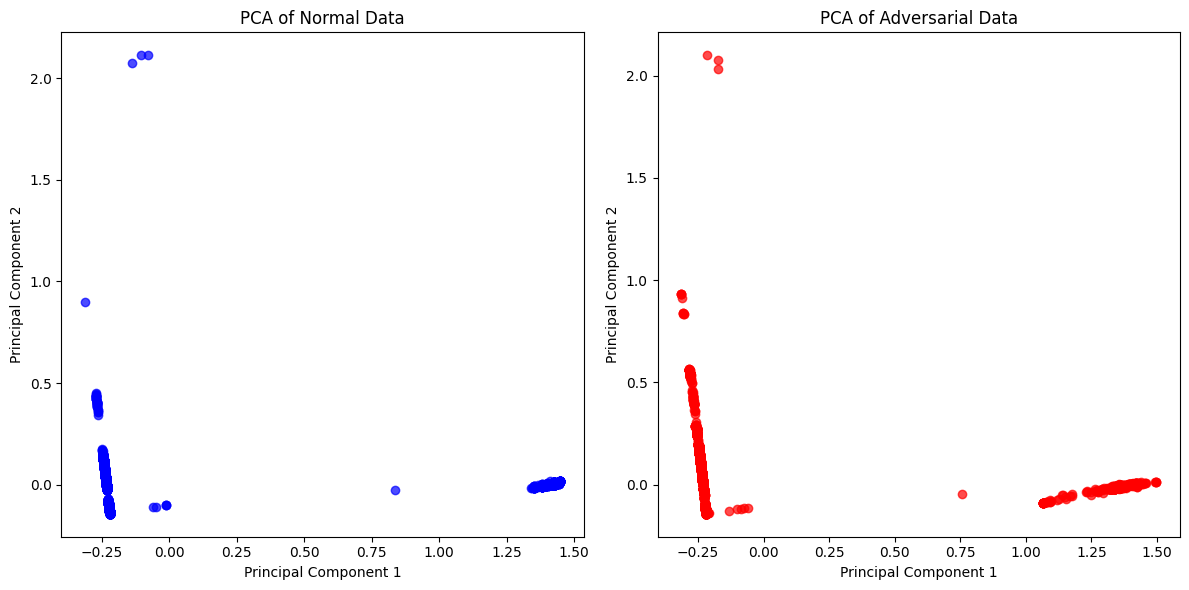

In [145]:
import functions.visualizer as visualizer
import importlib
importlib.reload(visualizer)

visualizer.visualize_data_distribution(X_train.loc[correctly_benign_classified_indices], 'Normal Data', X_adv.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Data')
visualizer.pca_visualization_side_by_side(X_train.loc[misclassified_as_benign_due_attack_indices], 'Normal Data', X_adv.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Data')

## Explainer

In [146]:
import functions.explainer as exp
import importlib
importlib.reload(exp)

explainer = exp.generate_shap_explainer(ids_model, X_train)

shap_values, shap_values_df = exp.generate_shap_values(explainer, X_train)
print(f"Generate Explanations | Indices: {shap_values_df.index[:5]}... | Shape: {shap_values_df.shape}")

shap_values_adv, shap_values_adv_df = exp.generate_shap_values(explainer, X_adv)
print(f"Generate Adversarial Explanations | Indices: {shap_values_adv_df.index[:5]}... | Shape: {shap_values_adv_df.shape}")

PermutationExplainer explainer: 16001it [08:12, 31.82it/s]                           


Generate Explanations | Indices: Index([971894, 575390, 2464696, 2065223, 505249], dtype='int64')... | Shape: (16000, 70)


PermutationExplainer explainer: 16001it [08:13, 31.78it/s]                           


Generate Adversarial Explanations | Indices: Index([971894, 575390, 2464696, 2065223, 505249], dtype='int64')... | Shape: (16000, 70)


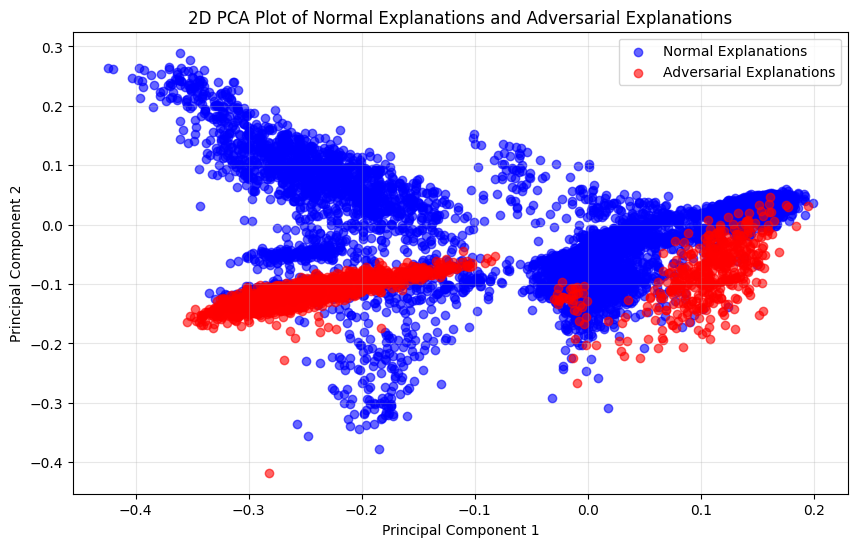

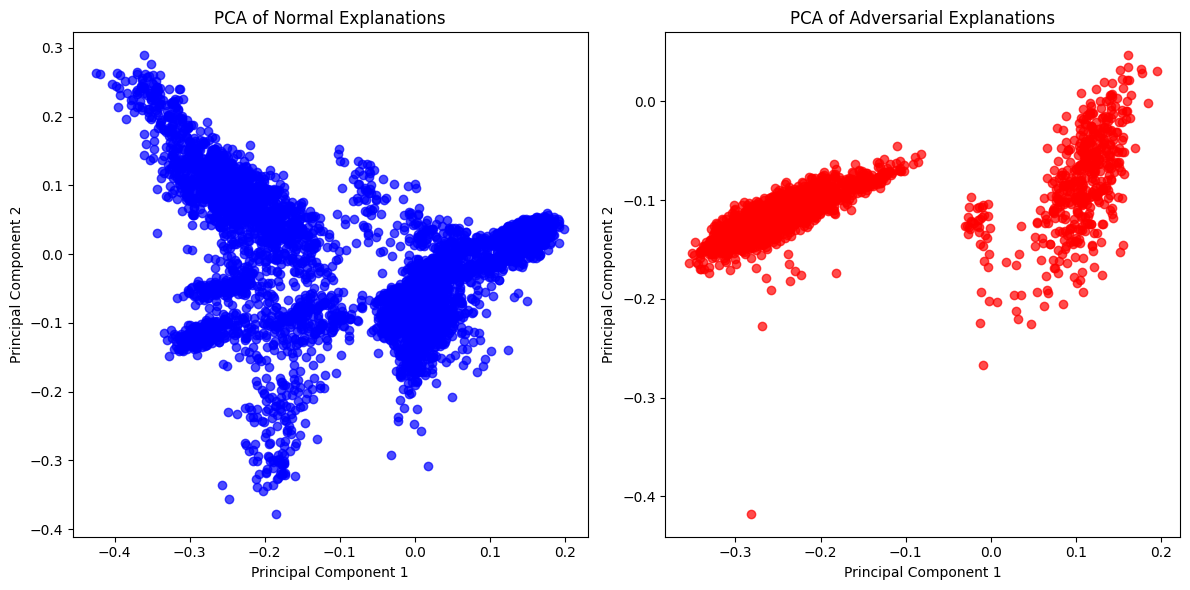

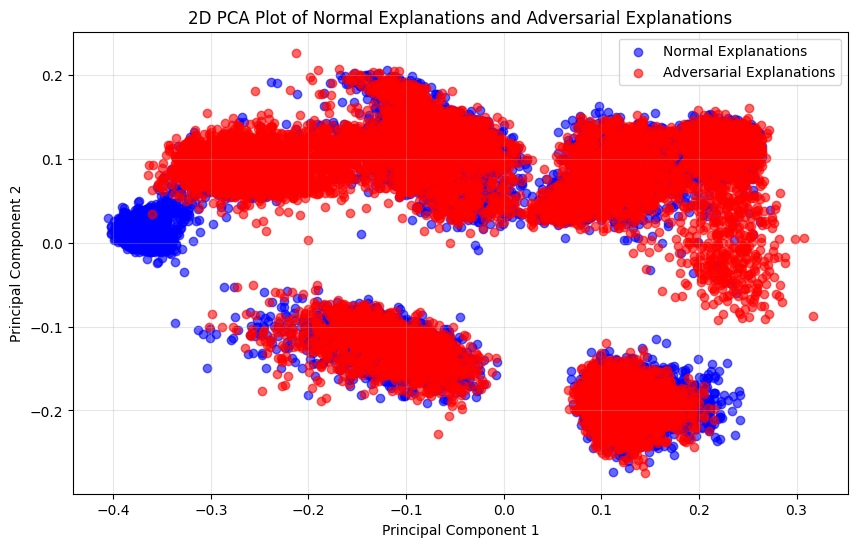

In [147]:
visualizer.visualize_data_distribution(shap_values_df.loc[correctly_benign_classified_indices], 'Normal Explanations', shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Explanations')
visualizer.pca_visualization_side_by_side(shap_values_df.loc[correctly_benign_classified_indices], 'Normal Explanations', shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Explanations')
visualizer.visualize_data_distribution(shap_values_df, 'Normal Explanations', shap_values_adv_df, 'Adversarial Explanations')

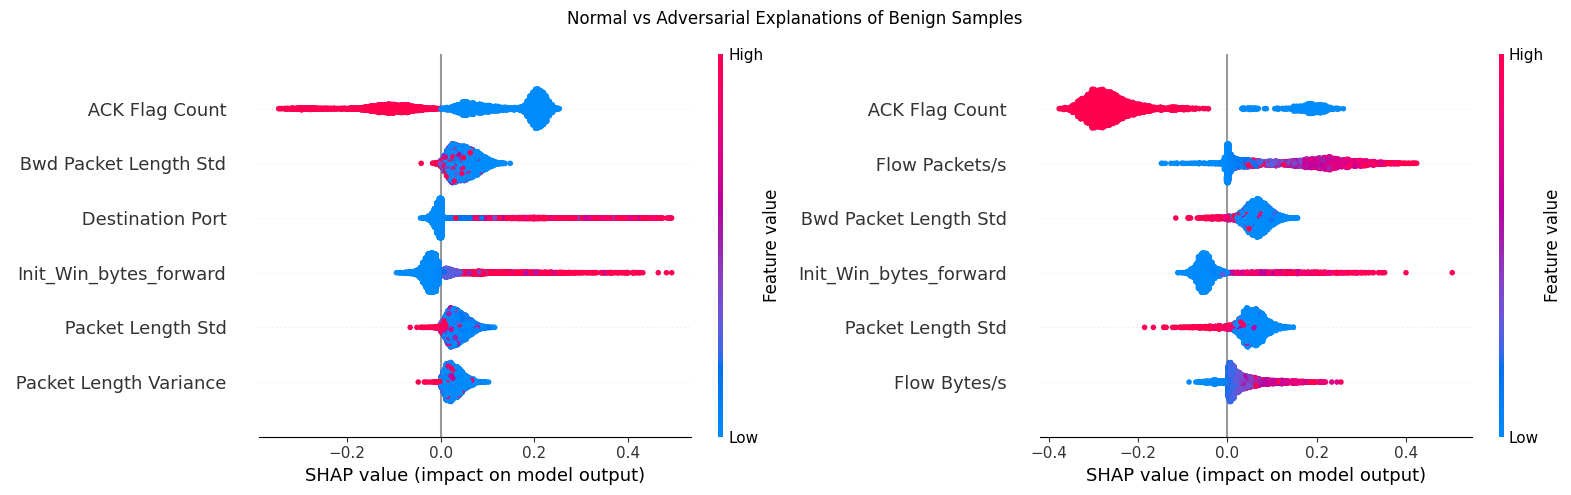

In [148]:
exp.plot_shap_summary_comparison(shap_values_df.loc[correctly_benign_classified_indices].values, X_train.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices].values, X_adv.loc[misclassified_as_benign_due_attack_indices], 6, title='Normal vs Adversarial Explanations of Benign Samples')

## Detector

In [149]:
import functions.detector as det
import importlib
importlib.reload(det)

# build detector to detect adversarial samples that misclassify attack samples as benign

# create dataframe
X, y = det.build_train_datasets(shap_values_df.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices])
print(X.shape, y.shape)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

(11322, 70) (11322, 2)
(10189, 70) (1133, 70) (10189, 2) (1133, 2)
Epoch 1/10


2025-03-18 15:34:30.241818: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8034 - loss: 0.6321 - val_accuracy: 0.9298 - val_loss: 0.2970
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9358 - loss: 0.2587 - val_accuracy: 0.9671 - val_loss: 0.0920
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9650 - loss: 0.1083 - val_accuracy: 0.9838 - val_loss: 0.0496
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9777 - loss: 0.0714 - val_accuracy: 0.9868 - val_loss: 0.0384
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.0560 - val_accuracy: 0.9892 - val_loss: 0.0339
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9833 - loss: 0.0491 - val_accuracy: 0.9902 - val_loss: 0.0299
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9855 - loss: 0.0450 - val_accuracy: 0.9902 - val_loss: 0.0291
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9869 - loss: 0.0439 - val_accuracy: 0.9902 - val_loss: 0.0282
Epo

---
## Evaluation: Identify and Block Dangerous Adversarial Attacks

### Generate Dataset, Attacks and Explanations

In [84]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# exclude previously used samples
dataset_eval_excluded = dataset.drop(index=used_indices)

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset_eval_excluded, encoding_type, normalizer, zero_columns, sample_size=400, random_sample_state=17)
print(f"Generate Features | Indices: {X_eval.index[:5]}... | Shape: {X_eval.shape}")
print(f"Generate Labels | Indices: {y_eval.index[:5]}... | Shape: {y_eval.shape}")
print(y_eval.value_counts())

-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (800, 79)
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (800, 70)
Generate Labels | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (800, 2)
BENIGN  ATTACK
False   True      400
True    False     400
Name: count, dtype: int64


In [85]:
importlib.reload(ag)

X_adv_eval = ag.generate_cw_attacks_parallel(art_model, X_eval, target_label=1, num_cores=num_cores)
print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

Running attack using 24 CPU cores...

Process 119226 is generating adversarial examples for batch of size 33 
Process 119225 is generating adversarial examples for batch of size 33 
Process 119227 is generating adversarial examples for batch of size 33 
Process 119228 is generating adversarial examples for batch of size 33 
Process 119229 is generating adversarial examples for batch of size 33 
Process 119231 is generating adversarial examples for batch of size 33 
Process 119230 is generating adversarial examples for batch of size 33 
Process 119232 is generating adversarial examples for batch of size 33 
Process 119233 is generating adversarial examples for batch of size 33 
Process 119234 is generating adversarial examples for batch of size 33 
Process 119236 is generating adversarial examples for batch of size 33 
Process 119237 is generating adversarial examples for batch of size 33 
Process 119235 is generating adversarial examples for batch of size 33 
Process 119238 is generati

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/41 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

Create Adversarial Attack | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (800, 70)
Accuracy: 76.25%
              precision    recall  f1-score   support

      BENIGN       1.00      0.53      0.69       400
      ATTACK       0.68      1.00      0.81       400

    accuracy                           0.76       800
   macro avg       0.84      0.76      0.75       800
weighted avg       0.84      0.76      0.75       800

Confusion Matrix: Positive == BENIGN
TN: 210, FP: 190, FN: 0, TP: 400
Predictions on Adversarial Attacks | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (800, 2)


In [86]:
importlib.reload(exp)
X_eval_adv_shap_values, X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

PermutationExplainer explainer: 801it [00:26, 18.74it/s]                         

Create Explanations | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (800, 70)


### Split Data into BENIGN and ATTACK Predicted Samples
Our detector wants to detect misclassified benign samples, so we need to divide attack and benign samples to further work on the benign samples.

In [87]:
# benign_predicted_indices = np.where(y_pred_adv_eval[:, 0] > 0.5)[0]
# print(f"#BENIGN adv: {len(benign_predicted_indices)}")
# malicious_predicted_indices = np.where(y_pred_adv_eval[:, 1] > 0.5)[0]
# print(f"#MALICIOUS adv: {len(malicious_predicted_indices)}")

# benign_predicted_indices = y_pred_adv_eval[y_pred_adv_eval == 1].index
# print(benign_predicted_indices[:4])
# print(f"#BENIGN adv: {len(benign_predicted_indices)}")
# malicious_predicted_indices = y_pred_adv_eval[y_pred_adv_eval == 0].index
# print(f"#MALICIOUS adv: {len(malicious_predicted_indices)}")

importlib.reload(ids)

y_pred_eval = ids.predict(ids_model, X_eval, columns=y_eval.columns)
print(f"Prediction on Normal Data | Indices: {y_pred_eval.index[:5]}... | Shape: {y_pred_eval.shape}")


benign_predicted_indices = y_pred_eval[y_pred_eval['BENIGN'] == 1].index
print(f"#BENIGN: {len(benign_predicted_indices)} | Indices: {benign_predicted_indices[:5]}")
benign_adv_predicted_indices = y_pred_adv_eval[y_pred_adv_eval['BENIGN'] == 1].index
print(f"#BENIGN adv: {len(benign_adv_predicted_indices)} | Indices: {benign_adv_predicted_indices[:5]}")
attack_predicted_indices = y_pred_eval[y_pred_eval['ATTACK'] == 1].index
print(f"#ATTACK: {len(attack_predicted_indices)} | Indices: {attack_predicted_indices[:5]}")
attack_adv_predicted_indices = y_pred_adv_eval[y_pred_adv_eval['ATTACK'] == 1].index
print(f"#ATTACK adv: {len(attack_adv_predicted_indices)} | Indices: {attack_adv_predicted_indices[:5]}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
Prediction on Normal Data | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (800, 2)
#BENIGN: 386 | Indices: Index([2056787, 2391506, 802264, 1981689, 972705], dtype='int64')
#BENIGN adv: 590 | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')
#ATTACK: 414 | Indices: Index([480604, 2048599, 1486095, 1750709, 2180482], dtype='int64')
#ATTACK adv: 210 | Indices: Index([436470, 402433, 397027, 445945, 412703], dtype='int64')


### From BENIGN Data: Find Correct and Misclassified Samples
We need these samples to test our detector if it correctly classified misclassified samples.

In [89]:
adv_correct_benign_indices = benign_predicted_indices.intersection(benign_adv_predicted_indices) # adversarial attack correctly classified as benign
print(f"#Correctly classified as BENIGN: {len(adv_correct_benign_indices)} | Indices: {adv_correct_benign_indices[:5]}")
adv_misclassified_benign_indices = attack_predicted_indices.intersection(benign_adv_predicted_indices) # attack misclassified as benign
print(f"#Misclassified as BENIGN: {len(adv_misclassified_benign_indices)} | Indices: {adv_misclassified_benign_indices[:5]}")

#Correctly classified as BENIGN: 386 | Indices: Index([2056787, 2391506, 802264, 1981689, 972705], dtype='int64')
#Misclassified as BENIGN: 204 | Indices: Index([480604, 2048599, 1486095, 1750709, 2180482], dtype='int64')


### Create Dataset for Explanation-Detector of BENIGN Samples

In [91]:
# create dataframe that contains all benign classified samples
# TODO: change column names of y
X_eval_detector, y_eval_detector = det.build_train_datasets(X_eval_adv_shap_values_df.loc[adv_correct_benign_indices], X_eval_adv_shap_values_df.loc[adv_misclassified_benign_indices])
print(X_eval_detector.shape, X_eval_detector.shape)

(590, 70) (590, 70)


### Run Detector

In [92]:
from sklearn.utils import shuffle
import pandas as pd
importlib.reload(det)

X_eval_detector, y_eval_detector = shuffle(X_eval_detector, y_eval_detector, random_state=187)

# TODO: use prediction method
y_pred_eval_detector = det.predict(detector, X_eval_detector, y_eval_detector.columns)

det.evaluate_model(y_pred_eval_detector, y_eval_detector)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Global Accuracy: 96.61%
              precision    recall  f1-score   support

      BENIGN       0.96      0.99      0.97       386
 ADVERSARIAL       0.98      0.92      0.95       204

    accuracy                           0.97       590
   macro avg       0.97      0.96      0.96       590
weighted avg       0.97      0.97      0.97       590

True Negative Rate: 98.96%
False Positive Rate: 1.04%
True Positive Rate: 92.16%
False Negative Rate: 7.84%


2025-03-18 13:09:16.285725: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


### Remove Bad Adversarial Attacks from BENIGN samples

In [93]:
X_eval_benign = X_eval.loc[benign_adv_predicted_indices]
X_eval_attack = X_eval.loc[attack_adv_predicted_indices]
y_eval_benign = y_eval.loc[benign_adv_predicted_indices]
y_eval_attack = y_eval.loc[attack_adv_predicted_indices]
print(X_eval_benign.shape, X_eval_attack.shape, y_eval_benign.shape, y_eval_attack.shape)

# find misclassified samples
predicted_bad_indices = y_pred_eval_detector[y_pred_eval_detector['ADVERSARIAL'] == 1].index
print(f"#Found Misclassified samples: {len(predicted_bad_indices)}")

# recreate dataset without bad adversarial attacks:
X_benign = X_eval_benign.drop(predicted_bad_indices)
y_benign = y_eval_benign.drop(predicted_bad_indices)
print(X_benign.shape, y_benign.shape)

# recreate original dataset with benign and attack predicted samples without the bad adversarial attacks
print(X_benign.shape, X_eval_attack.shape)
X_test = pd.concat([X_benign, X_eval_attack])
y_test = pd.concat([y_benign, y_eval_attack])
print(X_test.shape, y_test.shape)
print(f"#Samples before: {X_eval.shape[0]}; #Samples after: {X_test.shape[0]}")

(590, 70) (210, 70) (590, 2) (210, 2)
#Found Misclassified samples: 192
(398, 70) (398, 2)
(398, 70) (210, 70)
(608, 70) (608, 2)
#Samples before: 800; #Samples after: 608


### IDS on all Samples

In [94]:
y_pred = ids_model.predict(X_test)
# Evaluate
det.evaluate_model(y_pred, y_test)

 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Global Accuracy: 98.68%
              precision    recall  f1-score   support

      BENIGN       1.00      0.98      0.99       390
      ATTACK       0.96      1.00      0.98       218

    accuracy                           0.99       608
   macro avg       0.98      0.99      0.99       608
weighted avg       0.99      0.99      0.99       608

True Negative Rate: 97.95%
False Positive Rate: 2.05%
True Positive Rate: 100.00%
False Negative Rate: 0.00%


---
## Manual Evaluation

In [150]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# exclude previously used samples
dataset_eval_excluded = dataset_eval_excluded.drop(index=used_eval_indices)

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset_eval_excluded, encoding_type, normalizer, zero_columns, sample_size=400, random_sample_state=17)
print(f"Generate Features | Indices: {X_eval.index[:5]}... | Shape: {X_eval.shape}")
print(f"Generate Labels | Indices: {y_eval.index[:5]}... | Shape: {y_eval.shape}")
print(y_eval.value_counts())

-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (800, 79)
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([2426583, 2535011, 1635586, 955612, 970537], dtype='int64')... | Shape: (800, 70)
Generate Labels | Indices: Index([2426583, 2535011, 1635586, 955612, 970537], dtype='int64')... | Shape: (800, 2)
BENIGN  ATTACK
False   True      400
True    False     400
Name: count, dtype: int64


In [151]:
importlib.reload(ag)

X_adv_eval = ag.generate_cw_attacks_parallel(art_model, X_eval, target_label=1, num_cores=num_cores)
print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

Running attack using 24 CPU cores...

Process 210371 is generating adversarial examples for batch of size 33 
Process 210372 is generating adversarial examples for batch of size 33 
Process 210373 is generating adversarial examples for batch of size 33 
Process 210374 is generating adversarial examples for batch of size 33 
Process 210375 is generating adversarial examples for batch of size 33 
Process 210376 is generating adversarial examples for batch of size 33 
Process 210377 is generating adversarial examples for batch of size 33 
Process 210378 is generating adversarial examples for batch of size 33 
Process 210379 is generating adversarial examples for batch of size 33 
Process 210380 is generating adversarial examples for batch of size 33 
Process 210381 is generating adversarial examples for batch of size 33 
Process 210383 is generating adversarial examples for batch of size 33 
Process 210382 is generating adversarial examples for batch of size 33 
Process 210384 is generati

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/41 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/33 [00:00<?, ?it/s]

Create Adversarial Attack | Indices: Index([2426583, 2535011, 1635586, 955612, 970537], dtype='int64')... | Shape: (800, 70)
Accuracy: 79.12%
              precision    recall  f1-score   support

      BENIGN       1.00      0.58      0.74       400
      ATTACK       0.71      1.00      0.83       400

    accuracy                           0.79       800
   macro avg       0.85      0.79      0.78       800
weighted avg       0.85      0.79      0.78       800

Confusion Matrix: Positive == BENIGN
TN: 233, FP: 167, FN: 0, TP: 400
Predictions on Adversarial Attacks | Indices: Index([2426583, 2535011, 1635586, 955612, 970537], dtype='int64')... | Shape: (800, 2)


In [152]:
importlib.reload(exp)
X_eval_adv_shap_values, X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

PermutationExplainer explainer: 801it [00:26, 18.68it/s]                         

Create Explanations | Indices: Index([2426583, 2535011, 1635586, 955612, 970537], dtype='int64')... | Shape: (800, 70)


In [153]:
benign_eval_idx = y_eval[y_eval['BENIGN'] == 1].index
attack_eval_idx = y_eval[y_eval['ATTACK'] == 1].index

pred_benign_idx = y_pred_adv_eval[y_pred_adv_eval['BENIGN'] == 1].index
pred_attack_idx = y_pred_adv_eval[y_pred_adv_eval['ATTACK'] == 1].index

# predict
X_eval_detector = X_eval_adv_shap_values_df.loc[pred_benign_idx]

y_pred_eval_detector = det.predict(detector, X_eval_detector, y_eval.columns)
correctly_classified_det_idx = y_pred_eval_detector[y_pred_eval_detector['BENIGN'] == 1].index
misclassified_det_idx = y_pred_eval_detector[y_pred_eval_detector['ATTACK'] == 1].index


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step


2025-03-18 15:37:13.500487: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [154]:
# After IDS
TN = len(attack_eval_idx.intersection(pred_attack_idx)) # ids 
print(f"    TN_1: {TN}")
FN = len(benign_eval_idx.intersection(pred_attack_idx))
print(f"    FN_1: {FN}")

# After Detector
TP = len(benign_eval_idx.intersection(correctly_classified_det_idx))
print(f"    TP: {TP}")
FP = len(attack_eval_idx.intersection(correctly_classified_det_idx))
print(f"    FP: {FP}")

TN_2 = len(attack_eval_idx.intersection(misclassified_det_idx))
print(f"    TN_2: {TN_2}")
FN_2 = len(benign_eval_idx.intersection(misclassified_det_idx))
print(f"    FN_2: {FN_2}")

TN = TN + TN_2
FN = FN + FN_2

print(f"TP: {TP}")
print(f"FP: {FP}")
print(f"TN: {TN}")
print(f"FN: {FN}")
print(f"Sum: {TP + FP + TN + FN}")
print(f"Accuracy: {(TP + TN) / (TP + FP + TN + FN)}")


    TN_1: 233
    FN_1: 0
    TP: 399
    FP: 4
    TN_2: 163
    FN_2: 1
TP: 399
FP: 4
TN: 396
FN: 1
Sum: 800
Accuracy: 0.99375
